In [2]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

sys.path.append(os.path.abspath(".."))
fig_dir = '../outputs/figures'
os.makedirs(fig_dir, exist_ok=True)

BASE_DIR = Path().resolve().parent

DATA_DIR = BASE_DIR / "data"
INTERIM_DIR = DATA_DIR / "interim"
PROCESSED_DIR = DATA_DIR / "processed"

#LOG_INT_PATH = INTERIM_DIR / "log_int.pkl"
#MART_INT_PATH = INTERIM_DIR / "mart_int.pkl"
TPS_INT_PATH = INTERIM_DIR / "tps_sample.csv"
FINAL_DATASET1_PATH = PROCESSED_DIR / "tps_mart_log1.csv"
FINAL_DATASET2_PATH = PROCESSED_DIR / "final1.pickle"

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  



In [3]:
final1 = pd.read_pickle(FINAL_DATASET2_PATH)
final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6231525 entries, 0 to 6231524
Data columns (total 31 columns):
 #   Column                     Dtype   
---  ------                     -----   
 0   sha2_hash                  category
 1   SVC_USE_DAYS_GRP           int64   
 2   MEDIA_NM_GRP               category
 3   PROD_NM_GRP                category
 4   AGMT_KIND_NM               category
 5   INHOME_RATE                int64   
 6   TOTAL_USED_DAYS            int64   
 7   CH_HH_AVG_MONTH1           int64   
 8   VOC_TOTAL_MONTH1_YN        int64   
 9   VOC_STOP_CANCEL_MONTH1_YN  int64   
 10  AGE_GRP10                  int64   
 11  CH_LAST_DAYS_BF_GRP        int64   
 12  CH_FAV_RNK1                category
 13  KIDS_USE_PV_MONTH1         int64   
 14  NFX_USE_YN                 int64   
 15  YTB_USE_YN                 int64   
 16  p_mt                       int64   
 17  cancel_yn                  int64   
 18  sha2_hash_1                category
 19  asset                

## 가설검정
종속변수
- cencel_yn

독립변수

- CH_FAV_RNK1
- CH_LAST_DAYS_BF_GRP
- VOC_STOP_CANCEL_MONTH1_YN
- VOC_TOTAL_MONTH1_YN
- NFX_USE_YN
- YTB_USE_YN
- INHOME_RATE
- TOTAL_USED_DAYS
- CH_HH_AVG_MONTH1
- AGE_GRP10
- SVC_USE_DAYS_GRP
- TOTAL_USED_DAYS_BIN

자유도
- dof = 1	2×2 교차표 (아주 흔함)
- dof = 2~10	범주 적당히 있음
- dof = 10~50	범주 많음 (기대빈도 체크 필수)
- dof > 50	범주 과도 → 통합 권장

H1. 선호 채널 순위

- H0: CH_FAV_RNK1과 cancel_yn은 독립이다

- H1: CH_FAV_RNK1과 cancel_yn은 독립이 아니다

In [12]:
from scipy.stats import chi2_contingency

# 1. 교차표 생성
contingency_table = pd.crosstab(
    final1['CH_FAV_RNK1'],
    final1['cancel_yn']
)

print("교차표")
print(contingency_table)

# 2. 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\n카이제곱 검정 결과")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p:.6f}")
print(f"자유도(dof): {dof}")



교차표
cancel_yn          0        1
CH_FAV_RNK1                  
EBS            24663    12866
JTBC           78393    27367
KBS1          283839    65657
KBS2          162285    38243
MBC           122406    43787
MBN            72049    12146
OCN            44219    18263
SBS           184406    55133
TV조선          118938    28071
TV조선2           7602     1086
YTN           120515    33704
tvN           126524    42898
기타           2883145  1467751
연합뉴스TV        125277    30292

카이제곱 검정 결과
Chi-square statistic: 102924.6601
p-value: 0.000000
자유도(dof): 13


In [13]:
# 3. 기대빈도 확인
expected_df = pd.DataFrame(
    expected,
    index=contingency_table.index,
    columns=contingency_table.columns
)

print("\n기대빈도(Expected Frequencies)")
print(expected_df)


기대빈도(Expected Frequencies)
cancel_yn               0             1
CH_FAV_RNK1                            
EBS          2.622329e+04  1.130571e+04
JTBC         7.389951e+04  3.186049e+04
KBS1         2.442094e+05  1.052866e+05
KBS2         1.401184e+05  6.040961e+04
MBC          1.161269e+05  5.006610e+04
MBN          5.883103e+04  2.536397e+04
OCN          4.365913e+04  1.882287e+04
SBS          1.673772e+05  7.216178e+04
TV조선         1.027221e+05  4.428686e+04
TV조선2        6.070716e+03  2.617284e+03
YTN          1.077601e+05  4.645890e+04
tvN          1.183832e+05  5.103884e+04
기타           3.040177e+06  1.310719e+06
연합뉴스TV       1.087034e+05  4.686559e+04


H2. 최근 시청 공백 기간

- H0: CH_LAST_DAYS_BF_GRP와 cancel_yn은 독립이다

- H1: CH_LAST_DAYS_BF_GRP와 cancel_yn은 독립이 아니다

In [14]:
from scipy.stats import chi2_contingency

# 1. 교차표 생성
contingency_table = pd.crosstab(
    final1['CH_LAST_DAYS_BF_GRP'],
    final1['cancel_yn']
)

print("교차표")
print(contingency_table)

# 2. 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\n카이제곱 검정 결과")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p:.6f}")
print(f"자유도(dof): {dof}")



교차표
cancel_yn                  0        1
CH_LAST_DAYS_BF_GRP                  
0                    4150471  1309022
1                      58156   142911
2                      19738    62240
3                      16154    34221
4                       6744    13782
12                    102998   315088

카이제곱 검정 결과
Chi-square statistic: 793961.4101
p-value: 0.000000
자유도(dof): 5


H3. 해지 VOC 여부

- H0: VOC_STOP_CANCEL_MONTH1_YN과 cancel_yn은 독립이다

- H1: VOC_STOP_CANCEL_MONTH1_YN과 cancel_yn은 독립이 아니다

In [4]:
from scipy.stats import chi2_contingency

# 1. 교차표 생성
contingency_table = pd.crosstab(
    final1['VOC_STOP_CANCEL_MONTH1_YN'],
    final1['cancel_yn']
)

print("교차표")
print(contingency_table)

# 2. 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\n카이제곱 검정 결과")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p:.6f}")
print(f"자유도(dof): {dof}")

교차표
cancel_yn                        0        1
VOC_STOP_CANCEL_MONTH1_YN                  
0                          3948864  1313931
1                           405397   563333

카이제곱 검정 결과
Chi-square statistic: 428019.4033
p-value: 0.000000
자유도(dof): 1


H4. 전체 VOC 여부

- H0: VOC_TOTAL_MONTH1_YN과 cancel_yn은 독립이다

- H1: VOC_TOTAL_MONTH1_YN과 cancel_yn은 독립이 아니다



In [5]:
from scipy.stats import chi2_contingency

# 1. 교차표 생성
contingency_table = pd.crosstab(
    final1['VOC_TOTAL_MONTH1_YN'],
    final1['cancel_yn']
)

print("교차표")
print(contingency_table)

# 2. 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\n카이제곱 검정 결과")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p:.6f}")
print(f"자유도(dof): {dof}")

교차표
cancel_yn                  0       1
VOC_TOTAL_MONTH1_YN                 
0                    3179496  932166
1                    1174765  945098

카이제곱 검정 결과
Chi-square statistic: 319029.3733
p-value: 0.000000
자유도(dof): 1


H5. 넷플릭스 사용

- H0: NFX_USE_YN과 cancel_yn은 독립이다

- H1: NFX_USE_YN과 cancel_yn은 독립이 아니다

In [7]:
from scipy.stats import chi2_contingency

# 1. 교차표 생성
contingency_table = pd.crosstab(
    final1['NFX_USE_YN'],
    final1['cancel_yn']
)

print("교차표")
print(contingency_table)

# 2. 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\n카이제곱 검정 결과")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p:.6f}")
print(f"자유도(dof): {dof}")

교차표
cancel_yn         0        1
NFX_USE_YN                  
0           3792937  1576594
1            561324   300670

카이제곱 검정 결과
Chi-square statistic: 10747.0441
p-value: 0.000000
자유도(dof): 1


H6. 유튜브 사용

- H0: YTB_USE_YN과 cancel_yn은 독립이다

- H1: YTB_USE_YN과 cancel_yn은 독립이 아니다


In [8]:
from scipy.stats import chi2_contingency

# 1. 교차표 생성
contingency_table = pd.crosstab(
    final1['YTB_USE_YN'],
    final1['cancel_yn']
)

print("교차표")
print(contingency_table)

# 2. 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\n카이제곱 검정 결과")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p:.6f}")
print(f"자유도(dof): {dof}")

교차표
cancel_yn         0        1
YTB_USE_YN                  
0           3592631  1481870
1            761630   395394

카이제곱 검정 결과
Chi-square statistic: 11060.7046
p-value: 0.000000
자유도(dof): 1


H7. 재택 시청 비율

- H0: INHOME_RATE와 cancel_yn은 독립이다

- H1: INHOME_RATE와 cancel_yn은 독립이 아니다

In [22]:
from scipy.stats import ttest_ind

# 1. 집단 분리
keep_group = final1.loc[final1['cancel_yn'] == 0, 'INHOME_RATE']
cancel_group = final1.loc[final1['cancel_yn'] == 1, 'INHOME_RATE']
# 3. Welch t-test (등분산 가정 X)
t_stat, p_value = ttest_ind(
    keep_group,
    cancel_group,
    equal_var=False
)

print("H9. 집돌이 사총 비율   t-test 결과")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

# 4. 표본 평균도 같이 확인 (해석용)
print("\n집단별 평균")
print(f"유지(0): {keep_group.mean():.2f}")
print(f"해지(1): {cancel_group.mean():.2f}")

H9. 집돌이 사총 비율   t-test 결과
t-statistic: 480.9562
p-value: 0.000000

집단별 평균
유지(0): 38.19
해지(1): 29.15


H8. 총 이용일 수

- H0: TOTAL_USED_DAYS와 cancel_yn은 독립이다

- H1: TOTAL_USED_DAYS와 cancel_yn은 독립이 아니다

In [5]:
bins = [0, 1000, 2000, 3000, 4000, 5000, 10000, 20000, 50000]
labels = ['0-1k','1k-2k','2k-3k','3k-4k','4k-5k','5k-10k','10k-20k','20k-50k']
final1['TOTAL_USED_DAYS_BIN'] = pd.cut(final1['TOTAL_USED_DAYS'], bins=bins, labels=labels, include_lowest=True)

In [20]:
from scipy.stats import chi2_contingency

# 1. 교차표 생성
contingency_table = pd.crosstab(
    final1['TOTAL_USED_DAYS_BIN'],
    final1['cancel_yn']
)

print("교차표")
print(contingency_table)

# 2. 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\n카이제곱 검정 결과")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p:.6f}")
print(f"자유도(dof): {dof}")

교차표
cancel_yn                  0       1
TOTAL_USED_DAYS_BIN                 
0-1k                  322990  324743
1k-2k                 498163  433958
2k-3k                1329409  401299
3k-4k                1721274  569314
4k-5k                 439312  132624
5k-10k                 41645   13106
10k-20k                 1468    2220

카이제곱 검정 결과
Chi-square statistic: 328218.5560
p-value: 0.000000
자유도(dof): 6


H9. 가구 평균 시청량

- H0: CH_HH_AVG_MONTH1과 cancel_yn은 독립이다

- H1: CH_HH_AVG_MONTH1과 cancel_yn은 독립이 아니다

In [21]:
from scipy.stats import ttest_ind

# 1. 집단 분리
keep_group = final1.loc[final1['cancel_yn'] == 0, 'CH_HH_AVG_MONTH1']
cancel_group = final1.loc[final1['cancel_yn'] == 1, 'CH_HH_AVG_MONTH1']
# 3. Welch t-test (등분산 가정 X)
t_stat, p_value = ttest_ind(
    keep_group,
    cancel_group,
    equal_var=False
)

print("H9. 가구 평균 시청량 t-test 결과")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

# 4. 표본 평균도 같이 확인 (해석용)
print("\n집단별 평균")
print(f"유지(0): {keep_group.mean():.2f}")
print(f"해지(1): {cancel_group.mean():.2f}")

H9. 가구 평균 시청량 t-test 결과
t-statistic: 461.5594
p-value: 0.000000

집단별 평균
유지(0): 5.46
해지(1): 3.93



H10. 연령대

- H0: AGE_GRP10과 cancel_yn은 독립이다

- H1: AGE_GRP10과 cancel_yn은 독립이 아니다


In [10]:
from scipy.stats import chi2_contingency

# 1. 교차표 생성
contingency_table = pd.crosstab(
    final1['AGE_GRP10'],
    final1['cancel_yn']
)

print("교차표")
print(contingency_table)

# 2. 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\n카이제곱 검정 결과")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p:.6f}")
print(f"자유도(dof): {dof}")

교차표
cancel_yn        0       1
AGE_GRP10                 
0             2712     705
20           30082   30047
30          264190  208596
40          910557  460599
50         1374416  613498
60         1061691  356500
70          501500  134821
80          190868   61346
90           18245   11152

카이제곱 검정 결과
Chi-square statistic: 109522.6948
p-value: 0.000000
자유도(dof): 8


H11. 서비스 이용 기간

- H0: SVC_USE_DAYS_GRP와 cancel_yn은 독립이다

- H1: SVC_USE_DAYS_GRP와 cancel_yn은 독립이 아니다

In [15]:
from scipy.stats import chi2_contingency

# 1. 교차표 생성
contingency_table = pd.crosstab(
    final1['SVC_USE_DAYS_GRP'],
    final1['cancel_yn']
)

print("교차표")
print(contingency_table)

# 2. 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\n카이제곱 검정 결과")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p:.6f}")
print(f"자유도(dof): {dof}")

교차표
cancel_yn               0        1
SVC_USE_DAYS_GRP                  
0                  194124   121400
1                  193202   174565
2                  443241   205786
3                  368799   239886
4                 3154895  1135627

카이제곱 검정 결과
Chi-square statistic: 115949.6391
p-value: 0.000000
자유도(dof): 4


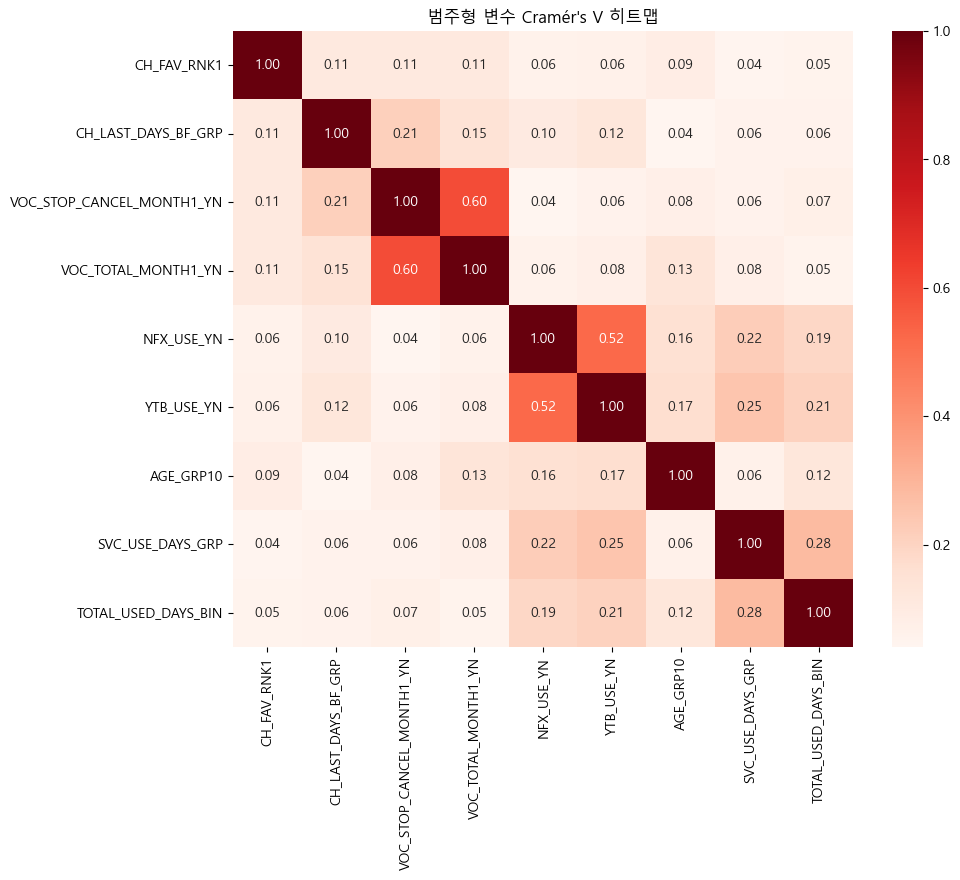

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# ===============================
# 1️⃣ Cramér's V 함수 정의
# ===============================
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape)-1)))

# ===============================
# 2️⃣ 범주형 변수 리스트
# ===============================
cat_cols = ['CH_FAV_RNK1', 'CH_LAST_DAYS_BF_GRP', 
            'VOC_STOP_CANCEL_MONTH1_YN', 'VOC_TOTAL_MONTH1_YN', 
            'NFX_USE_YN', 'YTB_USE_YN', 
            'AGE_GRP10', 'SVC_USE_DAYS_GRP', 'TOTAL_USED_DAYS_BIN']

# ===============================
# 3️⃣ Cramér's V 계산
# ===============================
cramers_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        cramers_matrix.loc[col1, col2] = cramers_v(final1[col1], final1[col2])

cramers_matrix = cramers_matrix.astype(float)

# ===============================
# 4️⃣ Cramér's V 히트맵
# ===============================
plt.figure(figsize=(10,8))
sns.heatmap(cramers_matrix, annot=True, cmap='Reds', fmt='.2f')
plt.title("범주형 변수 Cramér's V 히트맵")
plt.show()



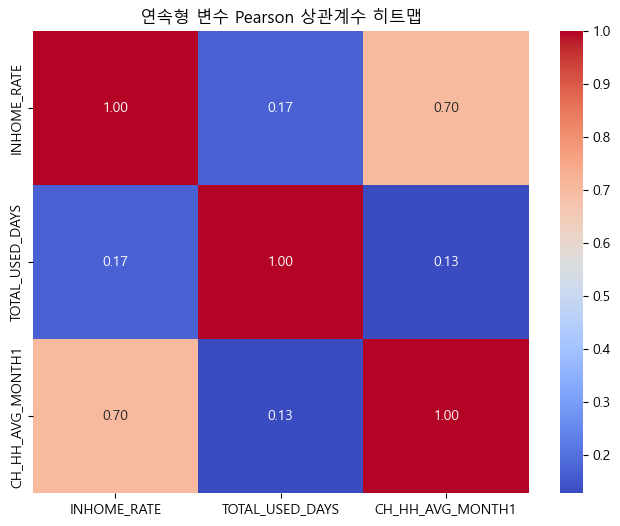

In [8]:
# ===============================
# 5️⃣ 연속형 변수 리스트
# ===============================
num_cols = ['INHOME_RATE', 'TOTAL_USED_DAYS', 'CH_HH_AVG_MONTH1']

# ===============================
# 6️⃣ Pearson 상관계수 계산
# ===============================
corr_matrix = final1[num_cols].corr()

# ===============================
# 7️⃣ 상관계수 히트맵
# ===============================
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("연속형 변수 Pearson 상관계수 히트맵")
plt.show()


- 연속형[INHOME_RATE,CH_HH_AVG_MONTH1 ]
- 범주형[NFX_USE_YN, YTB_USE_YN, VOC_STOP_CANCEL_MONTH1_YN, VOC_TOTAL_MONTH1_YN]

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1️⃣ 연속형 변수 선택
X_num = final1[['INHOME_RATE', 'CH_HH_AVG_MONTH1']].astype(float)

# 2️⃣ VIF 계산
vif_data = pd.DataFrame()
vif_data['feature'] = X_num.columns
vif_data['VIF'] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]

# 3️⃣ 결과 출력
print("연속형 변수 VIF 결과")
print(vif_data)

ModuleNotFoundError: No module named 'statsmodels'